In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
x=np.array([0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3])
y=np.array([0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2])

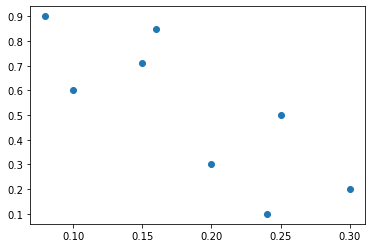

In [5]:
plt.scatter(x, y)

In [15]:
def distance(x1, y1, x2, y2):
	return math.fabs(x1- x2) + math.fabs(y1-y2)

In [16]:
def getCluster(m1 ,m2 , x, y):
	return 1 if distance(x, y, m1[0], m1[1]) < distance(x, y, m2[0], m2[1]) else 2

In [21]:
def kMeans(k=2):
	iteration = 1
	difference = math.inf
	threshold = 0.02
	m1 = [x[0], y[0]]
	m2 = [x[7], y[7]]
	while difference > threshold:
		print("Iteration ", iteration, " m1 = ", m1, " m2 = ", m2)
		cluster_1 = []
		cluster_2 = []
		for i in range(0, x.size):
			clusterNumber = getCluster(m1, m2, x[i], y[i])
			if clusterNumber == 1:
				cluster_1.append([x[i], y[i]])
			else:
				cluster_2.append([x[i], y[i]])
		m1_old = m1
		m2_old = m2
		m1=np.mean(cluster_1, axis=0)
		m2=np.mean(cluster_2, axis=0)
		xAvg=(math.fabs(m1[0] - m1_old[0]) + math.fabs(m2[0] - m2_old[0]))/2
		yAvg=(math.fabs(m1[1] - m1_old[1]) + math.fabs(m2[1] - m2_old[1]))/2
		difference = xAvg if xAvg > yAvg else yAvg
		print("Difference = ", difference, '\n')
		iteration += 1
	return [cluster_1, cluster_2, m1, m2]

In [22]:
cluster_1, cluster_2, m1, m2 = kMeans()

Iteration  1  m1 =  [0.1, 0.6]  m2 =  [0.3, 0.2]
Difference =  0.05600000000000001 

Iteration  2  m1 =  [0.148 0.712]  m2 =  [0.24666667 0.2       ]
Difference =  0.06400000000000002 

Iteration  3  m1 =  [0.1225 0.765 ]  m2 =  [0.2475 0.275 ]
Difference =  0.0 



[[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85]] [[0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]


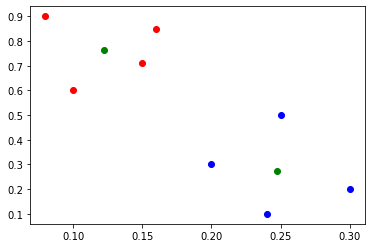

In [44]:
c1 = np.array(cluster_1)
c2 = np.array(cluster_2)
print(cluster_1, cluster_2)
plt.scatter(c1[:,0], c1[:, 1], color='red')
plt.scatter(c2[:,0], c2[:, 1], color='blue')
plt.scatter(m1[0], m1[1], color='green')
plt.scatter(m2[0], m2[1], color='green')